In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import requests
import time 
import math

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 400)

###### Import Player Data

In [2]:
player_data = pd.read_csv('player_data.csv', sep=',')

In [3]:
player_data.head()

,Player Rank,Player Name,Latest Team,Total Raids,Total Tackles,Matches Played,Total Points,Successful Raids,Raid Points,Average Raid Points,Do or Die Raid Points,Super Raids,Super 10s,Successful Tackles,Tackle Points,Average Tackle Points,Super Tackles,High 5s
0,1,Pardeep Narwal,Patna Pirates,1782,34,101,1055,798,1048,10.48,133,46,54,54,7,0.07,1,0
1,2,Rahul Chaudhari,Tamil Thalaivas,1963,182,117,991,766,933,7.97,161,24,40,40,58,0.50,5,0
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,1690,229,119,905,670,820,6.89,161,20,29,29,85,0.71,8,4
3,4,Ajay Thakur,Tamil Thalaivas,1687,82,115,811,640,790,6.87,163,23,29,29,21,0.18,0,0
4,5,Rohit Kumar,Bengaluru Bulls,1384,103,88,689,535,650,7.47,106,14,25,25,39,0.44,2,1


In [4]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 18 columns):
Player Rank              388 non-null int64
Player Name              388 non-null object
Latest Team              388 non-null object
Total Raids              388 non-null int64
Total Tackles            388 non-null int64
Matches Played           388 non-null int64
Total Points             388 non-null int64
Successful Raids         388 non-null int64
Raid Points              388 non-null int64
Average Raid Points      388 non-null float64
Do or Die Raid Points    388 non-null int64
Super Raids              388 non-null int64
Super 10s                388 non-null int64
Successful Tackles       388 non-null int64
Tackle Points            388 non-null int64
Average Tackle Points    388 non-null float64
Super Tackles            388 non-null int64
High 5s                  388 non-null int64
dtypes: float64(2), int64(14), object(2)
memory usage: 54.6+ KB


### Start With Task 6: Predict the player with the highest SUCCESSFUL RAID percentage 

###### For this task, we require only raids data, we will delete all tackles related data from the dataframe. Columns to be dropped from the dataframe are: "Total Tackles", "Successful Tackles", "Tackle Points", "Average Tackle Points", "Super Tackles" & "High 5s"

In [5]:
player_data.drop(columns = ['Total Tackles', "Successful Tackles", "Tackle Points", "Average Tackle Points", "Super Tackles", "High 5s" ], inplace = True)

In [6]:
player_data.head()

,Player Rank,Player Name,Latest Team,Total Raids,Matches Played,Total Points,Successful Raids,Raid Points,Average Raid Points,Do or Die Raid Points,Super Raids,Super 10s
0,1,Pardeep Narwal,Patna Pirates,1782,101,1055,798,1048,10.48,133,46,54
1,2,Rahul Chaudhari,Tamil Thalaivas,1963,117,991,766,933,7.97,161,24,40
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,1690,119,905,670,820,6.89,161,20,29
3,4,Ajay Thakur,Tamil Thalaivas,1687,115,811,640,790,6.87,163,23,29
4,5,Rohit Kumar,Bengaluru Bulls,1384,88,689,535,650,7.47,106,14,25


In [7]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
Player Rank              388 non-null int64
Player Name              388 non-null object
Latest Team              388 non-null object
Total Raids              388 non-null int64
Matches Played           388 non-null int64
Total Points             388 non-null int64
Successful Raids         388 non-null int64
Raid Points              388 non-null int64
Average Raid Points      388 non-null float64
Do or Die Raid Points    388 non-null int64
Super Raids              388 non-null int64
Super 10s                388 non-null int64
dtypes: float64(1), int64(9), object(2)
memory usage: 36.5+ KB


###### Data Cleanup: Delete all rows where total raids are 0. 

In [8]:
player_data[player_data['Total Raids'] == 0]

,Player Rank,Player Name,Latest Team,Total Raids,Matches Played,Total Points,Successful Raids,Raid Points,Average Raid Points,Do or Die Raid Points,Super Raids,Super 10s
59,60,Surjeet Narwal,Bengal Warriors,0,31,174,133,160,5.16,12,4,7
81,82,Sonu Narwal,Puneri Paltan,0,33,138,116,138,4.18,22,3,1
83,84,Sunil Jaipal,Bengaluru Bulls,0,38,125,63,87,2.29,13,4,0
116,115,Sandeep Kandola,Telugu Titans,0,16,70,7,11,1.38,0,0,0
117,118,Jitesh Joshi,Puneri Paltan,0,19,69,43,53,2.79,15,0,0
119,120,Pravin Niwale,Delhi Dabangs,0,17,64,43,62,3.88,14,5,1
129,130,Prashant Chavan,Delhi Dabangs,0,41,57,1,1,0.09,0,0,0
134,135,Shyam Kumar Sah,Bengal Warriors,0,27,53,11,17,1.00,1,1,0
139,138,Sachin Khambe,Puneri Paltan,0,22,51,5,5,0.56,1,0,0
142,143,Vinod Kumar,Puneri Paltan,0,27,48,0,0,0.00,0,0,0


In [9]:
player_data[player_data['Total Raids'] == 0].count()

Player Rank              128
Player Name              128
Latest Team              128
Total Raids              128
Matches Played           128
Total Points             128
Successful Raids         128
Raid Points              128
Average Raid Points      128
Do or Die Raid Points    128
Super Raids              128
Super 10s                128
dtype: int64

###### There are a total of 128 rows to be deleted 

In [10]:
player_data = player_data[player_data['Total Raids'] > 0] 

In [11]:
player_data

,Player Rank,Player Name,Latest Team,Total Raids,Matches Played,Total Points,Successful Raids,Raid Points,Average Raid Points,Do or Die Raid Points,Super Raids,Super 10s
0,1,Pardeep Narwal,Patna Pirates,1782,101,1055,798,1048,10.48,133,46,54
1,2,Rahul Chaudhari,Tamil Thalaivas,1963,117,991,766,933,7.97,161,24,40
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,1690,119,905,670,820,6.89,161,20,29
3,4,Ajay Thakur,Tamil Thalaivas,1687,115,811,640,790,6.87,163,23,29
4,5,Rohit Kumar,Bengaluru Bulls,1384,88,689,535,650,7.47,106,14,25
5,6,Maninder Singh,Bengal Warriors,1159,75,673,533,664,8.85,97,19,29
6,7,Rishank Devadiga,UP Yoddhas,1242,115,636,462,590,5.13,127,25,10
7,8,Kashiling Adake,Bengaluru Bulls,1190,92,612,424,561,6.10,103,23,15
8,9,Anup Kumar,Jaipur Pink Panthers,1346,91,596,421,527,5.79,33,17,13
9,10,Pawan Kumar Sehrawat,Bengaluru Bulls,835,72,572,417,542,7.86,70,18,23


In [12]:
player_data[player_data['Total Raids'] == 0].count()

Player Rank              0
Player Name              0
Latest Team              0
Total Raids              0
Matches Played           0
Total Points             0
Successful Raids         0
Raid Points              0
Average Raid Points      0
Do or Die Raid Points    0
Super Raids              0
Super 10s                0
dtype: int64

###### Check for Rows where Successful Raids > Total Raids & delete those rows. This is a data issue as successful raids cannot be greater then total raids

In [13]:
player_data[player_data['Successful Raids'] > player_data['Total Raids']] 

,Player Rank,Player Name,Latest Team,Total Raids,Matches Played,Total Points,Successful Raids,Raid Points,Average Raid Points,Do or Die Raid Points,Super Raids,Super 10s
15,16,Nitin Tomar,Puneri Paltan,63,63,446,361,426,6.76,52,10,14


###### 1 row to be deleted

In [14]:
player_data = player_data[player_data['Successful Raids'] <= player_data['Total Raids']] 

In [15]:
player_data.head()

,Player Rank,Player Name,Latest Team,Total Raids,Matches Played,Total Points,Successful Raids,Raid Points,Average Raid Points,Do or Die Raid Points,Super Raids,Super 10s
0,1,Pardeep Narwal,Patna Pirates,1782,101,1055,798,1048,10.48,133,46,54
1,2,Rahul Chaudhari,Tamil Thalaivas,1963,117,991,766,933,7.97,161,24,40
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,1690,119,905,670,820,6.89,161,20,29
3,4,Ajay Thakur,Tamil Thalaivas,1687,115,811,640,790,6.87,163,23,29
4,5,Rohit Kumar,Bengaluru Bulls,1384,88,689,535,650,7.47,106,14,25


In [16]:
player_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 259 entries, 0 to 386
Data columns (total 12 columns):
Player Rank              259 non-null int64
Player Name              259 non-null object
Latest Team              259 non-null object
Total Raids              259 non-null int64
Matches Played           259 non-null int64
Total Points             259 non-null int64
Successful Raids         259 non-null int64
Raid Points              259 non-null int64
Average Raid Points      259 non-null float64
Do or Die Raid Points    259 non-null int64
Super Raids              259 non-null int64
Super 10s                259 non-null int64
dtypes: float64(1), int64(9), object(2)
memory usage: 26.3+ KB


In [17]:
player_data['Total Raids'].value_counts()

1       18
2       13
6        8
5        7
7        6
11       6
10       6
9        6
4        6
3        6
19       5
12       4
13       4
42       3
28       3
67       3
71       3
18       3
36       3
17       3
15       3
8        3
158      2
75       2
35       2
66       2
61       2
55       2
110      2
211      2
225      2
89       2
37       2
21       2
14       2
33       2
31       2
30       2
16       2
320      2
82       1
20       1
76       1
530      1
79       1
34       1
86       1
73       1
94       1
103      1
104      1
618      1
107      1
109      1
600      1
23       1
22       1
47       1
32       1
628      1
38       1
543      1
44       1
45       1
50       1
25       1
53       1
29       1
54       1
58       1
60       1
65       1
115      1
1022     1
632      1
1384     1
784      1
666      1
294      1
296      1
301      1
309      1
1346     1
835      1
327      1
844      1
860      1
154      1
353      1
356      1
141      1

###### We will consider benchmark of minimum 100 raids for a player to classify for this prediction.

In [18]:
player_data[player_data['Total Raids'] < 100 ]

,Player Rank,Player Name,Latest Team,Total Raids,Matches Played,Total Points,Successful Raids,Raid Points,Average Raid Points,Do or Die Raid Points,Super Raids,Super 10s
26,27,Ravinder Pahal,Delhi Dabangs,58,105,321,8,14,0.54,0,0,0
32,33,Fazel Atrachali,U Mumba,44,95,292,2,4,0.14,0,0,0
35,36,Mohit Chhillar,Tamil Thalaivas,31,107,283,3,7,0.29,0,0,0
39,40,Girish Maruti Ernak,Puneri Paltan,67,102,266,3,9,0.22,1,1,0
41,42,Surender Nada,Haryana Steelers,79,71,243,15,21,0.54,2,0,0
43,44,Amit Hooda,Jaipur Pink Panthers,53,84,233,4,9,0.35,1,0,0
44,45,Jeeva Kumar,Bengal Warriors,4,108,222,1,1,0.00,0,0,0
47,48,Vishal Bhardwaj,Telugu Titans,60,56,192,1,1,0.04,0,0,0
48,48,Sandeep Kumar Dhull,Jaipur Pink Panthers,5,60,192,0,1,0.00,0,0,0
50,51,Nitesh Kumar,UP Yoddhas,11,60,191,0,2,0.22,0,0,0


In [19]:
player_data[player_data['Total Raids'] < 100 ].count()

Player Rank              171
Player Name              171
Latest Team              171
Total Raids              171
Matches Played           171
Total Points             171
Successful Raids         171
Raid Points              171
Average Raid Points      171
Do or Die Raid Points    171
Super Raids              171
Super 10s                171
dtype: int64

###### Delete the 171 player rows where total raids are < 100

In [20]:
player_data = player_data[player_data['Total Raids'] >= 100 ]

In [21]:
player_data.head()

,Player Rank,Player Name,Latest Team,Total Raids,Matches Played,Total Points,Successful Raids,Raid Points,Average Raid Points,Do or Die Raid Points,Super Raids,Super 10s
0,1,Pardeep Narwal,Patna Pirates,1782,101,1055,798,1048,10.48,133,46,54
1,2,Rahul Chaudhari,Tamil Thalaivas,1963,117,991,766,933,7.97,161,24,40
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,1690,119,905,670,820,6.89,161,20,29
3,4,Ajay Thakur,Tamil Thalaivas,1687,115,811,640,790,6.87,163,23,29
4,5,Rohit Kumar,Bengaluru Bulls,1384,88,689,535,650,7.47,106,14,25


###### Change Column Sequence, "Total Raids" before "Successful Raids"

In [22]:
player_data = player_data[['Player Rank', 'Player Name', 'Latest Team', 'Matches Played', 'Total Points', 'Total Raids', 'Successful Raids', 'Raid Points', 'Average Raid Points', 'Do or Die Raid Points', 'Super Raids', 'Super 10s']]

In [23]:
player_data.head()

,Player Rank,Player Name,Latest Team,Matches Played,Total Points,Total Raids,Successful Raids,Raid Points,Average Raid Points,Do or Die Raid Points,Super Raids,Super 10s
0,1,Pardeep Narwal,Patna Pirates,101,1055,1782,798,1048,10.48,133,46,54
1,2,Rahul Chaudhari,Tamil Thalaivas,117,991,1963,766,933,7.97,161,24,40
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,119,905,1690,670,820,6.89,161,20,29
3,4,Ajay Thakur,Tamil Thalaivas,115,811,1687,640,790,6.87,163,23,29
4,5,Rohit Kumar,Bengaluru Bulls,88,689,1384,535,650,7.47,106,14,25


In [24]:
player_data = player_data.reset_index(drop = True)

###### We will now derive new column: "Successful Raid Percentage", which is calculated as Successful Raids / Total Raids.

In [25]:
successful_raids = player_data['Successful Raids']
total_raids = player_data['Total Raids']
successful_raids_percentage = (successful_raids / total_raids) * 100

In [26]:
len(successful_raids_percentage)

88

###### Insert new column "Successful Raids Percentage" before the column "Raid Points"

In [27]:
player_data.insert(7, "Successful Raids Percentage", successful_raids_percentage)

In [28]:
player_data.head()

,Player Rank,Player Name,Latest Team,Matches Played,Total Points,Total Raids,Successful Raids,Successful Raids Percentage,Raid Points,Average Raid Points,Do or Die Raid Points,Super Raids,Super 10s
0,1,Pardeep Narwal,Patna Pirates,101,1055,1782,798,44.781145,1048,10.48,133,46,54
1,2,Rahul Chaudhari,Tamil Thalaivas,117,991,1963,766,39.021905,933,7.97,161,24,40
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,119,905,1690,670,39.644970,820,6.89,161,20,29
3,4,Ajay Thakur,Tamil Thalaivas,115,811,1687,640,37.937167,790,6.87,163,23,29
4,5,Rohit Kumar,Bengaluru Bulls,88,689,1384,535,38.656069,650,7.47,106,14,25


In [29]:
player_data = player_data.reset_index(drop = True)

In [30]:
player_data.head()

,Player Rank,Player Name,Latest Team,Matches Played,Total Points,Total Raids,Successful Raids,Successful Raids Percentage,Raid Points,Average Raid Points,Do or Die Raid Points,Super Raids,Super 10s
0,1,Pardeep Narwal,Patna Pirates,101,1055,1782,798,44.781145,1048,10.48,133,46,54
1,2,Rahul Chaudhari,Tamil Thalaivas,117,991,1963,766,39.021905,933,7.97,161,24,40
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,119,905,1690,670,39.644970,820,6.89,161,20,29
3,4,Ajay Thakur,Tamil Thalaivas,115,811,1687,640,37.937167,790,6.87,163,23,29
4,5,Rohit Kumar,Bengaluru Bulls,88,689,1384,535,38.656069,650,7.47,106,14,25


###### Delete the columns "Total Raids" & "Successful Raids", as "Successful Raids Percentage" to be predicted by the linear model is derived from these two columns. Also "Average Raid Points" is derived from "Total Raids" and to be deleted

In [31]:
player_data.drop(columns = ['Total Raids', 'Successful Raids', 'Average Raid Points'], inplace = True)

Copy the player_data frame to a new dataframe: player_data_final_raid_predictions to make predictions based on the model being derived

In [32]:
player_data_final_raid_predictions = player_data.copy()

In [33]:
player_data_final_raid_predictions.head()

,Player Rank,Player Name,Latest Team,Matches Played,Total Points,Successful Raids Percentage,Raid Points,Do or Die Raid Points,Super Raids,Super 10s
0,1,Pardeep Narwal,Patna Pirates,101,1055,44.781145,1048,133,46,54
1,2,Rahul Chaudhari,Tamil Thalaivas,117,991,39.021905,933,161,24,40
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,119,905,39.644970,820,161,20,29
3,4,Ajay Thakur,Tamil Thalaivas,115,811,37.937167,790,163,23,29
4,5,Rohit Kumar,Bengaluru Bulls,88,689,38.656069,650,106,14,25


###### Also drop columns: "Player Rank", "Player Name", "Latest Team" that have no bearing on analysis

In [34]:
player_data.drop(columns = ['Player Rank', 'Player Name', 'Latest Team'], inplace = True)

In [35]:
player_data.head()

,Matches Played,Total Points,Successful Raids Percentage,Raid Points,Do or Die Raid Points,Super Raids,Super 10s
0,101,1055,44.781145,1048,133,46,54
1,117,991,39.021905,933,161,24,40
2,119,905,39.644970,820,161,20,29
3,115,811,37.937167,790,163,23,29
4,88,689,38.656069,650,106,14,25


###### Split the player dataframe into train and test sets

In [36]:
# We specify this so that the train and test data set always have the same rows, respectively

df_train, df_test = train_test_split(player_data, train_size = 0.7, test_size = 0.3, random_state = 100)

In [37]:
df_test.head()

,Matches Played,Total Points,Successful Raids Percentage,Raid Points,Do or Die Raid Points,Super Raids,Super 10s
80,25,52,27.559055,50,10,4,0
57,29,141,36.245955,134,41,3,6
76,39,62,15.639810,38,7,0,0
28,57,295,35.736196,285,36,9,5
42,48,184,32.093023,176,19,3,6


In [38]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27 entries, 80 to 36
Data columns (total 7 columns):
Matches Played                 27 non-null int64
Total Points                   27 non-null int64
Successful Raids Percentage    27 non-null float64
Raid Points                    27 non-null int64
Do or Die Raid Points          27 non-null int64
Super Raids                    27 non-null int64
Super 10s                      27 non-null int64
dtypes: float64(1), int64(6)
memory usage: 1.7 KB


In [39]:
df_train.head()

,Matches Played,Total Points,Successful Raids Percentage,Raid Points,Do or Die Raid Points,Super Raids,Super 10s
51,82,156,20.000000,45,10,0,0
56,49,142,23.938224,75,22,2,0
21,90,358,40.390390,349,65,8,11
62,35,100,37.440758,99,20,0,0
32,74,279,31.546708,277,60,4,5


In [40]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 51 to 8
Data columns (total 7 columns):
Matches Played                 61 non-null int64
Total Points                   61 non-null int64
Successful Raids Percentage    61 non-null float64
Raid Points                    61 non-null int64
Do or Die Raid Points          61 non-null int64
Super Raids                    61 non-null int64
Super 10s                      61 non-null int64
dtypes: float64(1), int64(6)
memory usage: 3.8 KB


###### Rescale Features using Min Max Scaler

In [41]:
scaler = MinMaxScaler()
num_vars = ['Matches Played', 'Total Points', 'Successful Raids Percentage', 'Raid Points', 'Do or Die Raid Points', 'Super Raids', 'Super 10s' ]
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

df_train.head()

,Matches Played,Total Points,Successful Raids Percentage,Raid Points,Do or Die Raid Points,Super Raids,Super 10s
51,0.654206,0.118627,0.320827,0.034649,0.061350,0.000000,0.000000
56,0.345794,0.104902,0.406564,0.063523,0.134969,0.043478,0.000000
21,0.728972,0.316667,0.764734,0.327238,0.398773,0.173913,0.203704
62,0.214953,0.063725,0.700520,0.086622,0.122699,0.000000,0.000000
32,0.579439,0.239216,0.572204,0.257940,0.368098,0.086957,0.092593


###### Divide into X & Y. Y = 'Successful Raids Percentage'

In [42]:
y_train = df_train.pop('Successful Raids Percentage')
X_train = df_train

In [43]:
y_train.head()

51    0.320827
56    0.406564
21    0.764734
62    0.700520
32    0.572204
Name: Successful Raids Percentage, dtype: float64

In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 51 to 8
Data columns (total 6 columns):
Matches Played           61 non-null float64
Total Points             61 non-null float64
Raid Points              61 non-null float64
Do or Die Raid Points    61 non-null float64
Super Raids              61 non-null float64
Super 10s                61 non-null float64
dtypes: float64(6)
memory usage: 3.3 KB


In [45]:
X_train.head()

,Matches Played,Total Points,Raid Points,Do or Die Raid Points,Super Raids,Super 10s
51,0.654206,0.118627,0.034649,0.061350,0.000000,0.000000
56,0.345794,0.104902,0.063523,0.134969,0.043478,0.000000
21,0.728972,0.316667,0.327238,0.398773,0.173913,0.203704
62,0.214953,0.063725,0.086622,0.122699,0.000000,0.000000
32,0.579439,0.239216,0.257940,0.368098,0.086957,0.092593


###### Model Selection using RFE 

In [46]:
# Running RFE with the output number of the variable equal to 6
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 6)
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('Matches Played', True, 1),
 ('Total Points', True, 1),
 ('Raid Points', True, 1),
 ('Do or Die Raid Points', True, 1),
 ('Super Raids', True, 1),
 ('Super 10s', True, 1)]

In [48]:
col = X_train.columns[rfe.support_]
col

Index(['Matches Played', 'Total Points', 'Raid Points',
       'Do or Die Raid Points', 'Super Raids', 'Super 10s'],
      dtype='object')

In [49]:
X_train.columns[~rfe.support_]

Index([], dtype='object')

###### Building model using statsmodel, for the detailed statistics (Use GLM inplace of OLS for percetage pediction)

In [50]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [51]:
# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

In [52]:
# Run the linear model
lm = sm.GLM(y_train,X_train_rfe, family=sm.families.Gamma() ).fit()
print(lm.summary())

                      Generalized Linear Model Regression Results                      
Dep. Variable:     Successful Raids Percentage   No. Observations:                   61
Model:                                     GLM   Df Residuals:                       54
Model Family:                            Gamma   Df Model:                            6
Link Function:                   inverse_power   Scale:                        0.072799
Method:                                   IRLS   Log-Likelihood:                    inf
Date:                         Sun, 22 Sep 2019   Deviance:                       72.868
Time:                                 15:25:12   Pearson chi2:                     3.93
No. Iterations:                              7   Covariance Type:             nonrobust
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     1.

In [53]:
# Drop the column "Do or Die Raid Points" from the model (P-Value: 0.247)
X_train_new = X_train_rfe.drop(["Do or Die Raid Points"], axis = 1)

In [54]:
# Run the linear model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.GLM(y_train,X_train_lm, family=sm.families.Gamma()).fit()

In [55]:
print(lm.summary())

                      Generalized Linear Model Regression Results                      
Dep. Variable:     Successful Raids Percentage   No. Observations:                   61
Model:                                     GLM   Df Residuals:                       55
Model Family:                            Gamma   Df Model:                            5
Link Function:                   inverse_power   Scale:                        0.073545
Method:                                   IRLS   Log-Likelihood:                    inf
Date:                         Sun, 22 Sep 2019   Deviance:                       72.930
Time:                                 15:25:13   Pearson chi2:                     4.04
No. Iterations:                              7   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.8454      0.127     1

In [56]:
X_train_new.columns

Index(['const', 'Matches Played', 'Total Points', 'Raid Points', 'Super Raids',
       'Super 10s'],
      dtype='object')

In [57]:
X_train_new = X_train_new.drop(['const'], axis=1)

In [58]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Points,62.85
2,Raid Points,60.74
4,Super 10s,19.40
0,Matches Played,14.25
3,Super Raids,10.40


In [59]:
# Drop the column "Super Raids" with highest P-Value 0.149 and VIF: 10.40
X_train_new = X_train_new.drop(["Super Raids"], axis = 1)

In [60]:
# Run the linear model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.GLM(y_train,X_train_lm, family=sm.families.Gamma()).fit()
print(lm.summary())

                      Generalized Linear Model Regression Results                      
Dep. Variable:     Successful Raids Percentage   No. Observations:                   61
Model:                                     GLM   Df Residuals:                       56
Model Family:                            Gamma   Df Model:                            4
Link Function:                   inverse_power   Scale:                        0.074672
Method:                                   IRLS   Log-Likelihood:                    inf
Date:                         Sun, 22 Sep 2019   Deviance:                       73.054
Time:                                 15:25:14   Pearson chi2:                     4.18
No. Iterations:                              7   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.8242      0.127     1

In [61]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Total Points,62.54
2,Raid Points,51.09
3,Super 10s,19.28
0,Matches Played,14.21


In [62]:
# Drop the column "Total Points" with P-Value: 0.135 VIF: 62.54
X_train_new = X_train_new.drop(["Total Points"], axis = 1)

In [63]:
# Run the linear model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.GLM(y_train,X_train_lm, family=sm.families.Gamma()).fit()
print(lm.summary())

                      Generalized Linear Model Regression Results                      
Dep. Variable:     Successful Raids Percentage   No. Observations:                   61
Model:                                     GLM   Df Residuals:                       57
Model Family:                            Gamma   Df Model:                            3
Link Function:                   inverse_power   Scale:                        0.071853
Method:                                   IRLS   Log-Likelihood:                    inf
Date:                         Sun, 22 Sep 2019   Deviance:                       72.981
Time:                                 15:25:14   Pearson chi2:                     4.10
No. Iterations:                              7   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.7269      0.106     1

In [64]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,Raid Points,34.86
2,Super 10s,16.19
0,Matches Played,8.30


In [65]:
# Drop the column "Raid Points" (VIF: 34.86)
X_train_new = X_train_new.drop(["Raid Points"], axis = 1)

In [66]:
# Run the linear model
X_train_lm = sm.add_constant(X_train_new)
lm = sm.GLM(y_train,X_train_lm, family=sm.families.Gamma()).fit()
print(lm.summary())

                      Generalized Linear Model Regression Results                      
Dep. Variable:     Successful Raids Percentage   No. Observations:                   61
Model:                                     GLM   Df Residuals:                       58
Model Family:                            Gamma   Df Model:                            2
Link Function:                   inverse_power   Scale:                        0.071628
Method:                                   IRLS   Log-Likelihood:                    inf
Date:                         Sun, 22 Sep 2019   Deviance:                       73.313
Time:                                 15:25:14   Pearson chi2:                     4.15
No. Iterations:                              8   Covariance Type:             nonrobust
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.7331      0.109     1

In [67]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,Matches Played,1.94
1,Super 10s,1.94


###### The equation of the initial linear model is Successful Raids Percentage = ( 1.73 + [ (0.56) * Matches Played ] - [ (1.46) * Super 10s ] )

###### Residual Analysis of the train data

So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [68]:
y_train_successful_raids_percentage = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

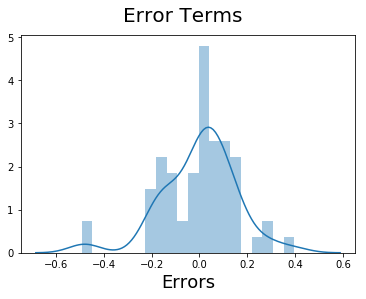

In [69]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_successful_raids_percentage), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

###### Error terms are normally distributed with mean centered around 0. We now proceed with 

###### We will now proceed with making predictions on the test dataset

In [70]:
num_vars = ['Matches Played', 'Total Points', 'Successful Raids Percentage', 'Raid Points', 'Do or Die Raid Points', 'Super Raids', 'Super 10s' ]

df_test[num_vars] = scaler.transform(df_test[num_vars])
df_test.head()

,Matches Played,Total Points,Successful Raids Percentage,Raid Points,Do or Die Raid Points,Super Raids,Super 10s
80,0.121495,0.016667,0.485391,0.039461,0.061350,0.086957,0.000000
57,0.158879,0.103922,0.674508,0.120308,0.251534,0.065217,0.111111
76,0.252336,0.026471,0.225904,0.027911,0.042945,0.000000,0.000000
28,0.420561,0.254902,0.663411,0.265640,0.220859,0.195652,0.092593
42,0.336449,0.146078,0.584097,0.160731,0.116564,0.065217,0.111111


In [71]:
y_test = df_test.pop('Successful Raids Percentage')
X_test = df_test

In [72]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [73]:
y_pred = lm.predict(X_test_new)

In [74]:
y_pred.head()

80    0.555077
57    0.602358
76    0.533246
28    0.545038
42    0.568104
dtype: float64

In [75]:
y_pred.count()

27

Text(0, 0.5, 'y_pred')

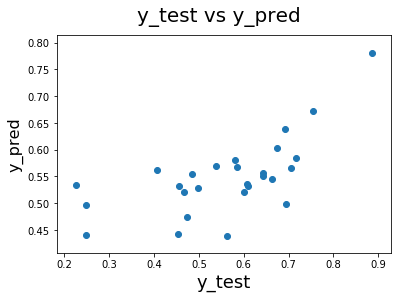

In [76]:
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

###### Our Final Equation will be: Successful Raids Percentage = Successful Raids Percentage = ( 1.73 + [ (0.56) * Matches Played ] - [ (1.46) * Super 10s ] )

In [77]:
player_data_final_raid_predictions.head()

,Player Rank,Player Name,Latest Team,Matches Played,Total Points,Successful Raids Percentage,Raid Points,Do or Die Raid Points,Super Raids,Super 10s
0,1,Pardeep Narwal,Patna Pirates,101,1055,44.781145,1048,133,46,54
1,2,Rahul Chaudhari,Tamil Thalaivas,117,991,39.021905,933,161,24,40
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,119,905,39.644970,820,161,20,29
3,4,Ajay Thakur,Tamil Thalaivas,115,811,37.937167,790,163,23,29
4,5,Rohit Kumar,Bengaluru Bulls,88,689,38.656069,650,106,14,25


In [78]:
player_data.head()

,Matches Played,Total Points,Successful Raids Percentage,Raid Points,Do or Die Raid Points,Super Raids,Super 10s
0,101,1055,44.781145,1048,133,46,54
1,117,991,39.021905,933,161,24,40
2,119,905,39.644970,820,161,20,29
3,115,811,37.937167,790,163,23,29
4,88,689,38.656069,650,106,14,25


In [79]:
player_data_final_raid_predictions = player_data_final_raid_predictions[['Player Rank', 'Player Name', 'Latest Team']]

In [80]:
player_data_final_raid_predictions.head()

,Player Rank,Player Name,Latest Team
0,1,Pardeep Narwal,Patna Pirates
1,2,Rahul Chaudhari,Tamil Thalaivas
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers
3,4,Ajay Thakur,Tamil Thalaivas
4,5,Rohit Kumar,Bengaluru Bulls


In [81]:
player_data_final_raid_predictions['Matches Played'] = player_data['Matches Played']
player_data_final_raid_predictions['Super 10s'] = player_data['Super 10s']

In [82]:
player_data_final_raid_predictions.head()

,Player Rank,Player Name,Latest Team,Matches Played,Super 10s
0,1,Pardeep Narwal,Patna Pirates,101,54
1,2,Rahul Chaudhari,Tamil Thalaivas,117,40
2,3,Deepak Niwas Hooda,Jaipur Pink Panthers,119,29
3,4,Ajay Thakur,Tamil Thalaivas,115,29
4,5,Rohit Kumar,Bengaluru Bulls,88,25


In [83]:
player_data_final_raid_predictions['Predicted Successful Raids Percentage'] = (1.73 + (0.56 * player_data_final_raid_predictions['Matches Played'])) -  (1.46 * player_data_final_raid_predictions['Super 10s']) 

In [86]:
player_data_final_raid_predictions[['Player Name', 'Latest Team', 'Predicted Successful Raids Percentage']].sort_values(by='Predicted Successful Raids Percentage', ascending=False).head(1)

,Player Name,Latest Team,Predicted Successful Raids Percentage
25,Ran Singh,Tamil Thalaivas,66.13


### Final prediction: Ran Singh (Tamil Thalaivas) will top the chart for best successful raids percentage